In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import TimestampedGeoJson

In [29]:
# load the dataset
df = pd.read_csv(r'../data/russia_ukraine_conflict.csv')

# checking info about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154251 entries, 0 to 154250
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   event_id_cnty       154251 non-null  object 
 1   event_date          154251 non-null  object 
 2   year                154251 non-null  int64  
 3   time_precision      154251 non-null  int64  
 4   disorder_type       154251 non-null  object 
 5   event_type          154251 non-null  object 
 6   sub_event_type      154251 non-null  object 
 7   actor1              154251 non-null  object 
 8   assoc_actor_1       16341 non-null   object 
 9   inter1              154251 non-null  object 
 10  actor2              74788 non-null   object 
 11  assoc_actor_2       7892 non-null    object 
 12  inter2              74788 non-null   object 
 13  interaction         154251 non-null  object 
 14  civilian_targeting  9108 non-null    object 
 15  iso                 154251 non-nul

In [30]:
# check stats of fatalities
fatalities_stats = df['fatalities'].describe()
print(fatalities_stats)

count    154251.000000
mean          1.051617
std           7.778656
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         600.000000
Name: fatalities, dtype: float64


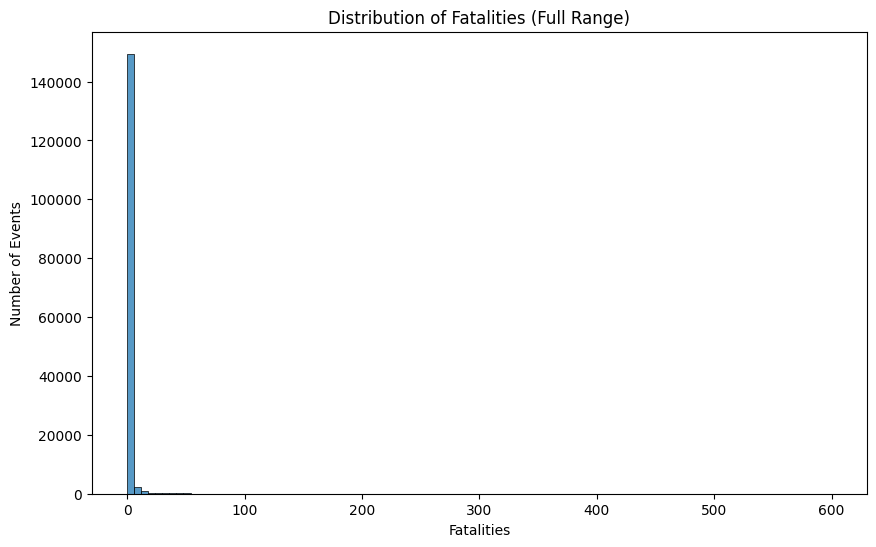

In [31]:
# checking whats skewing data
# basic histogram
plt.figure(figsize=(10,6))
sns.histplot(df['fatalities'], bins=100, kde=False)
plt.title('Distribution of Fatalities (Full Range)')
plt.xlabel('Fatalities')
plt.ylabel('Number of Events')
plt.show()

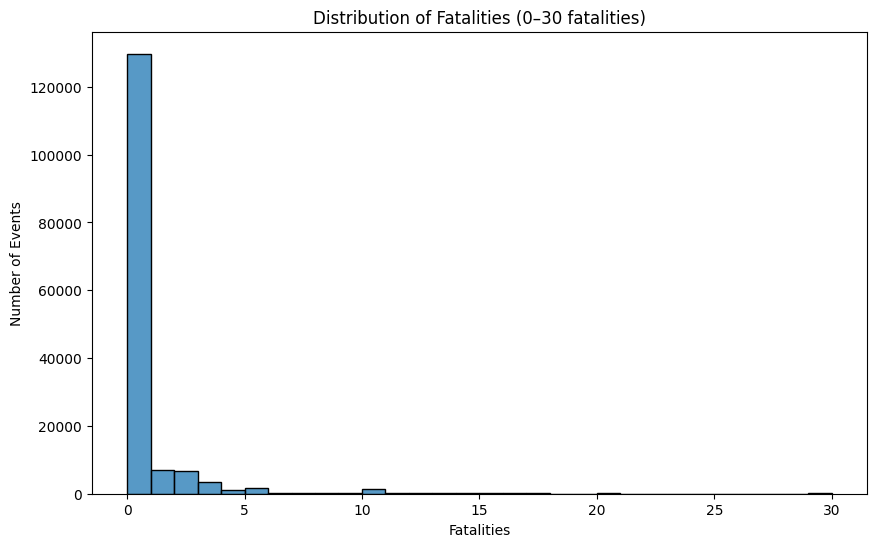

In [32]:
# zoomed in histogram (0-30 fatalities)
plt.figure(figsize=(10,6))
sns.histplot(df[df['fatalities'] <= 30]['fatalities'], bins=30, kde=False)
plt.title('Distribution of Fatalities (0–30 fatalities)')
plt.xlabel('Fatalities')
plt.ylabel('Number of Events')
plt.show()

In [33]:
# Display top 10 events with the highest fatalities
df.sort_values(by='fatalities', ascending=False).head(10)

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
118538,UKR89111,26 January 2023,2023,1,Political violence,Battles,Armed clash,Military Forces of Russia (2000-),NaN,External/Other forces,...,Bakhmut,48.5956,37.9999,2,Institute for the Study of War; Ministry of De...,Other,"On 26 January 2023, Ukrainian military forces ...",600,NaN,1675798463
77768,UKR136436,15 November 2023,2023,1,Political violence,Battles,Armed clash,Military Forces of Russia (2000-),Military Forces of Russia (2000-) Air Force,External/Other forces,...,Novoprokopivka,47.4198,35.8323,2,Deep State; Unian,National,"On 15 November 2023, Russian and Ukrainian mil...",594,NaN,1700602891
128938,UKR81485,05 November 2022,2022,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),NaN,State forces,...,Makiivka,49.2265,37.9863,2,Institute for the Study of War,Other,"On 5 November 2022, Ukrainian forces shelled a...",500,NaN,1738712998
129041,UKR80523,04 November 2022,2022,2,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),NaN,State forces,...,Makiivka,49.2265,37.9863,2,Novoye Vremya Ukraine; Ukrayinska Pravda,National,"Around 4 November 2022, Ukrainian forces kille...",500,NaN,1738712997
152653,UKR57975,11 May 2022,2022,1,Political violence,Battles,Armed clash,Military Forces of Ukraine (2019-),NaN,State forces,...,Bilohorivka,48.9259,38.2467,3,24 Channel; Institute for the Study of War; Uk...,Other-National,"On 11 May 2022, a Russian tank regiment attemp...",485,NaN,1653401104
108637,UKR99064,10 April 2023,2023,1,Political violence,Battles,Armed clash,Military Forces of Russia (2000-),Wagner Group,External/Other forces,...,Bakhmut,48.5956,37.9999,2,Institute for the Study of War; Ministry of De...,Other-National,"On 10 April 2023, Russian forces and Wagner gr...",450,NaN,1737495608
81747,UKR132349,19 October 2023,2023,1,Political violence,Battles,Armed clash,Military Forces of Russia (2000-),Military Forces of Russia (2000-) Air Force,External/Other forces,...,Avdiivka,48.1394,37.7497,2,Ministry of Defence of Ukraine; Novoye Vremya ...,Other-National,"On 19 October 2023, Russia and Ukrainian milit...",450,NaN,1738712888
52313,UKR160660,20 May 2024,2024,1,Political violence,Battles,Armed clash,Military Forces of Russia (2000-),NaN,External/Other forces,...,Pokrovsk,48.2810,37.1814,2,Ministry of Defence of Ukraine,Other,"On 20 May 2024, seven clashes between Russian ...",400,NaN,1738712924
137167,UKR71722,05 September 2022,2022,2,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),NaN,State forces,...,Kreminna,49.0495,38.2179,1,Novoye Vremya Ukraine; 24 Channel,National,"Around 5 September 2022 (week of), Ukrainian f...",400,NaN,1663096246
81774,UKR132434,18 October 2023,2023,1,Political violence,Battles,Armed clash,Military Forces of Ukraine (2019-),NaN,State forces,...,Zaporizhia,47.8479,35.1602,3,Novoye Vremya Ukraine,National,"On 18 October 2023, Ukrainian forces clashed w...",322,NaN,1698180619


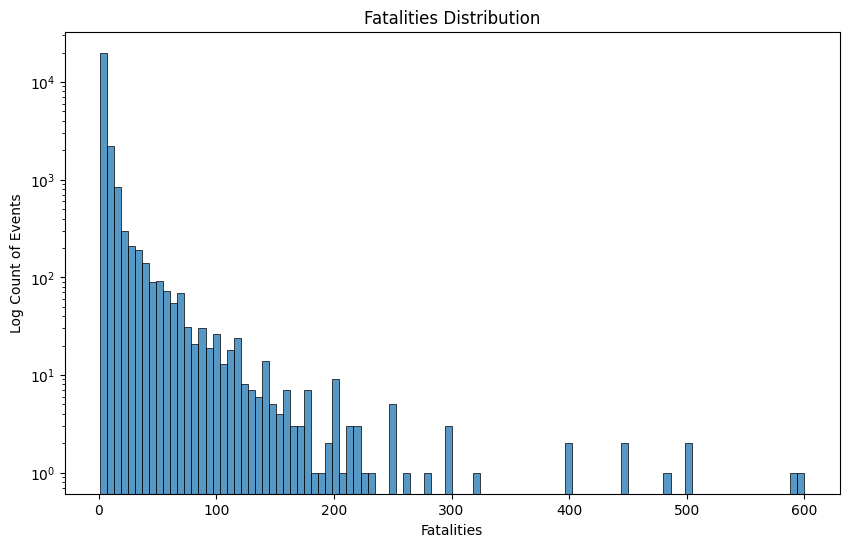

In [48]:
# flatten the skew
plt.figure(figsize=(10,6))
sns.histplot(df[df['fatalities'] > 0]['fatalities'], bins=100)
plt.yscale('log')
plt.title('Fatalities Distribution')
plt.xlabel('Fatalities')
plt.ylabel('Log Count of Events')
plt.show()

In [49]:
# filtering for events with high fatalities
high_fatal_df = df[df['fatalities'] > 20].sort_values(by='event_date') # if fatalities value is greater than 20
print(high_fatal_df[['event_date', 'country', 'region', 'location', 'fatalities', 'event_type', 'notes']])

       event_date  country  region       location  fatalities  \
154087 2022-04-21  Ukraine  Europe       Mykolaiv          51   
154082 2022-04-21  Ukraine  Europe      Kurakhove         250   
154033 2022-04-22  Ukraine  Europe      Melitopol          30   
154045 2022-04-22  Ukraine  Europe    Virnopillia          50   
153913 2022-04-24  Ukraine  Europe      Kyselivka          74   
...           ...      ...     ...            ...         ...   
367    2025-04-17  Ukraine  Europe  Yelyzavetivka          34   
372    2025-04-17  Ukraine  Europe    Zelene Pole          35   
321    2025-04-17  Ukraine  Europe  Preobrazhenka          34   
54     2025-04-18  Ukraine  Europe        Kherson          32   
53     2025-04-18  Ukraine  Europe        Kherson          43   

                        event_type  \
154087  Explosions/Remote violence   
154082                     Battles   
154033                     Battles   
154045                     Battles   
153913  Explosions/Remote vio

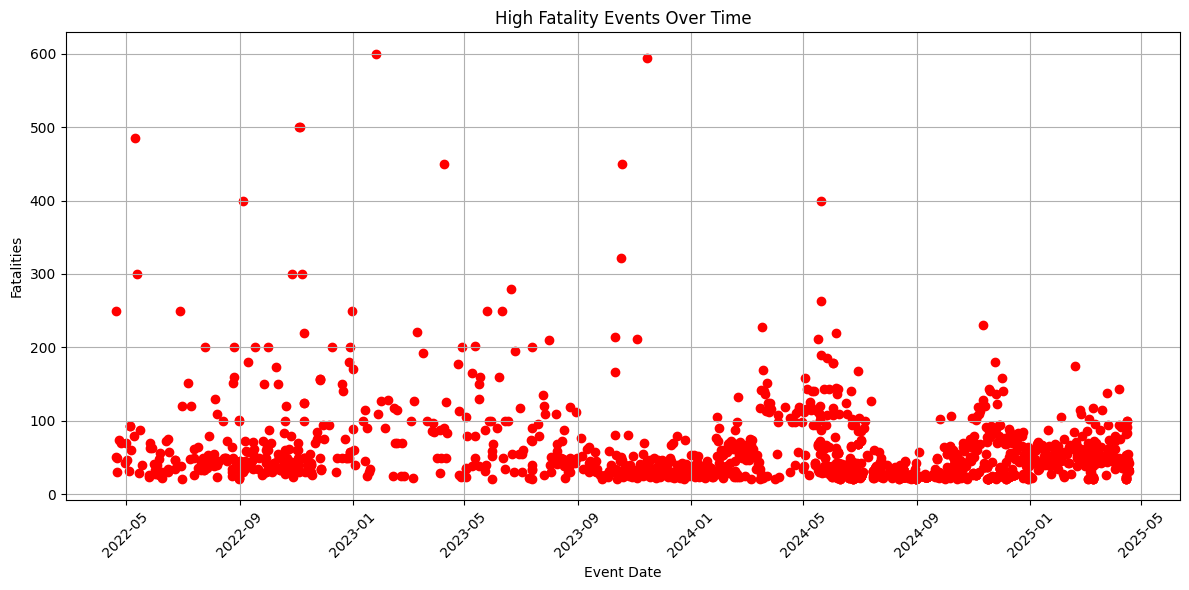

In [50]:
# Visually confirming high fatalities
plt.figure(figsize=(12,6))
plt.scatter(pd.to_datetime(high_fatal_df['event_date']), high_fatal_df['fatalities'], color='red')
plt.title('High Fatality Events Over Time')
plt.xlabel('Event Date')
plt.ylabel('Fatalities')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
# Ensure event_date column is in datetime format
df["event_date"] = pd.to_datetime(df["event_date"], errors='coerce')

# Filter for high fatality events (e.g., 20 or more fatalities)
high_fatal = df[df["fatalities"] >= 20].copy()

# Format data for animated time map
features = []
for _, row in high_fatal.iterrows():
    feature = {
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [row['longitude'], row['latitude']]
        },
        'properties': {
            'time': row['event_date'].strftime('%Y-%m-%dT%H:%M:%S'),
            'popup': f"{row['location']}<br>Fatalities: {row['fatalities']}<br>Date: {row['event_date'].date()}",
            'icon': 'circle',
            'iconstyle': {
                'fillColor': 'red',
                'fillOpacity': 0.7,
                'stroke': 'true',
                'radius': min(20, row['fatalities'] / 5)
            }
        }
    }
    features.append(feature)

# Create the map
m = folium.Map(location=[48.3794, 31.1656], zoom_start=6)

# Add TimestampedGeoJson
TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': features,
}, period='P1D',
   add_last_point=True,
   auto_play=True,
   loop=False,
   max_speed=1,
   loop_button=True,
   date_options='YYYY-MM-DD',
   time_slider_drag_update=True).add_to(m)

# Save the map to static directory
m.save("../static/high_fatality_events_map.html")
print("Map saved as 'high_fatality_events_map.html'")

Map saved as 'high_fatality_events_map.html'


In [52]:
#